In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df=pd.read_csv('/content/california_housing.csv')

In [75]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [76]:
df.shape

(20640, 9)

In [77]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

#MedInc:	Median income in the block group (in tens of thousands of dollars).
#HouseAge:	Median age of houses in the block group.
#AveRooms	:Average number of rooms per household.
#AveBedrms:	Average number of bedrooms per household.
#Population:	Total population of the block group.
#AveOccup	:Average number of household members per household.
#Latitude	:Latitude of the block group (geographic coordinate).
#Longitude:	Longitude of the block group (geographic coordinate).
#MedHouseVal>	Median house value (in hundreds of thousands of dollars) .



In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [79]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [80]:
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


In [81]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [82]:
X=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**data preprocessing**
feature scaling

In [100]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [101]:
X_train_scaled

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [102]:
X_test_scaled

array([[-1.14237625, -0.30073951, -0.43367721, ...,  0.52022395,
         0.22194113,  0.25541734],
       [-0.69050482,  0.098724  , -0.13050312, ..., -0.16293193,
        -0.20947715,  0.02976613],
       [-0.18616932,  1.85636346, -0.51063381, ..., -0.91557569,
         1.03788441, -1.46454628],
       ...,
       [ 2.87008893, -0.30073951,  0.65618087, ..., -0.09978765,
         0.80810728, -1.2689819 ],
       [-0.55565035,  0.57808022, -0.04116447, ..., -0.21494651,
         0.5548835 , -0.120668  ],
       [-0.14789765, -0.93988113, -0.50645235, ...,  0.43607226,
        -0.64089543,  0.57634349]])

In [94]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [103]:
lr.fit(X_train_scaled,y_train)

LinearRegression()

In [104]:
y_pred=lr.predict(X_test_scaled)

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [109]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [112]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 0.5353166913867712
Mean Squared Error (MSE): 0.5388649914036733
R-squared (R²): 0.5887810596909611


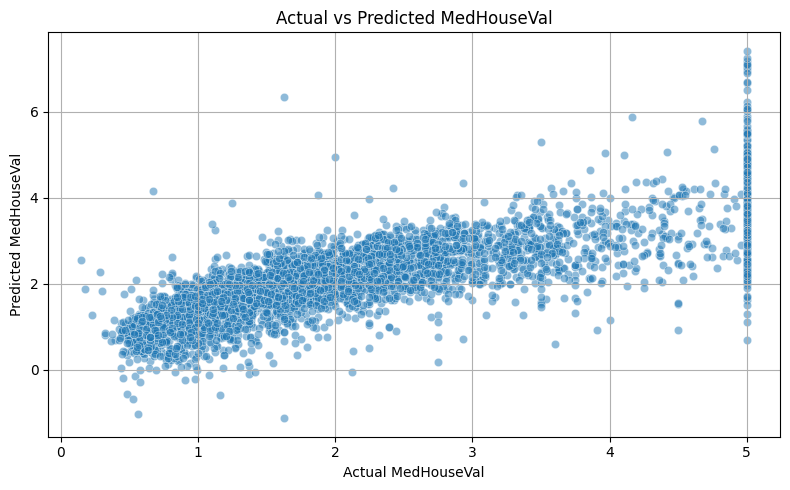

In [114]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred,alpha=0.5)
plt.xlabel("Actual MedHouseVal")
plt.ylabel("Predicted MedHouseVal")
plt.title("Actual vs Predicted MedHouseVal")
plt.grid(True)
plt.tight_layout()
plt.show()

**conclusion**:The model explains about 57.6% of the variance in housing prices.



In [116]:
coefficients = pd.Series(lr.coef_, index=X.columns)
print("\nModel Coefficients:\n", coefficients)


Model Coefficients:
 MedInc        0.854383
HouseAge      0.122546
AveRooms     -0.294410
AveBedrms     0.339259
Population   -0.002308
AveOccup     -0.040829
Latitude     -0.896929
Longitude    -0.869842
dtype: float64
